In [98]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
# from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import LabelEncoder
# from xgboost import XGBClassifier
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Reading the Dataset

In [99]:
df = pd.read_csv("train.csv")
df.drop('Id', axis = 1, inplace = True)
df


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,...,0,0,0,0,0,0,0,0,0,3
15116,2603,121,19,633,195,618,249,221,91,1325,...,0,0,0,0,0,0,0,0,0,3
15117,2492,134,25,365,117,335,250,220,83,1187,...,0,0,0,0,0,0,0,0,0,3
15118,2487,167,28,218,101,242,229,237,119,932,...,0,0,0,0,0,0,0,0,0,3


## Randomizing the order of the DataFrame


In [100]:
df.sample(frac=1)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
3915,2205,120,26,150,75,1282,253,207,64,658,...,0,0,0,0,0,0,0,0,0,4
8260,3085,208,16,201,15,1723,207,253,177,631,...,0,0,0,0,0,0,0,0,0,1
12532,2327,109,27,547,246,1452,254,198,53,990,...,0,0,0,0,0,0,0,0,0,4
12284,2858,75,13,0,0,787,236,215,108,1667,...,0,0,0,0,0,0,0,0,0,2
3087,2350,40,33,351,60,721,203,150,60,362,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5414,2442,302,18,228,70,1003,166,229,202,902,...,0,0,0,0,0,0,0,0,0,6
13589,2751,237,16,190,56,939,191,252,196,1926,...,0,0,0,0,0,0,0,0,0,5
300,2913,261,10,313,10,5706,197,245,187,5517,...,0,0,0,0,0,0,0,0,0,2
4834,2194,124,13,0,0,892,241,231,117,1401,...,0,0,0,0,0,0,0,0,0,4


## Exploratory Data Analysis

## 1. Finding NULL values

In [101]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


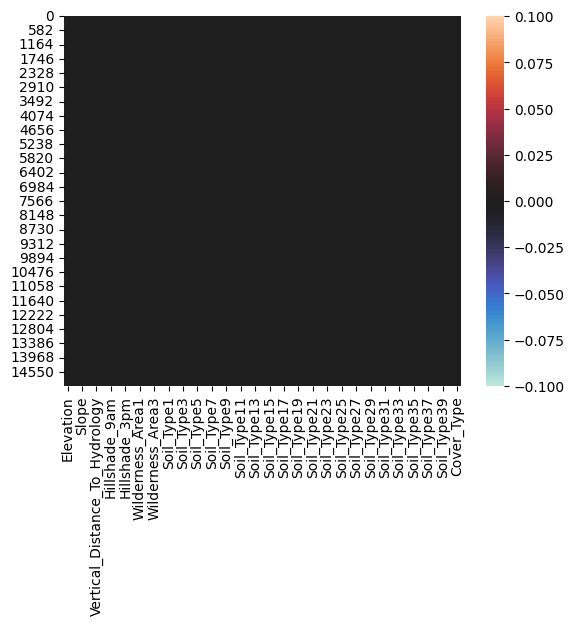

In [102]:
sns.heatmap(df.isnull(),cmap='icefire')
plt.show()


In [103]:

df['Wilderness_Area_Type'] = (df.iloc[:, 10:15] == 1).idxmax(1)
wilderness_areas = sorted(df['Wilderness_Area_Type'].value_counts().index.tolist())
print(wilderness_areas)

['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']


<AxesSubplot: xlabel='Cover_Type', ylabel='Elevation'>

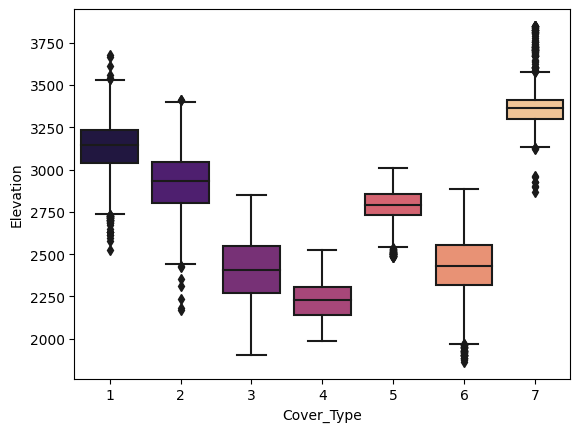

In [104]:
sns.boxplot(x='Cover_Type',y='Elevation',data=df,palette='magma')

<AxesSubplot: xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Fire_Points'>

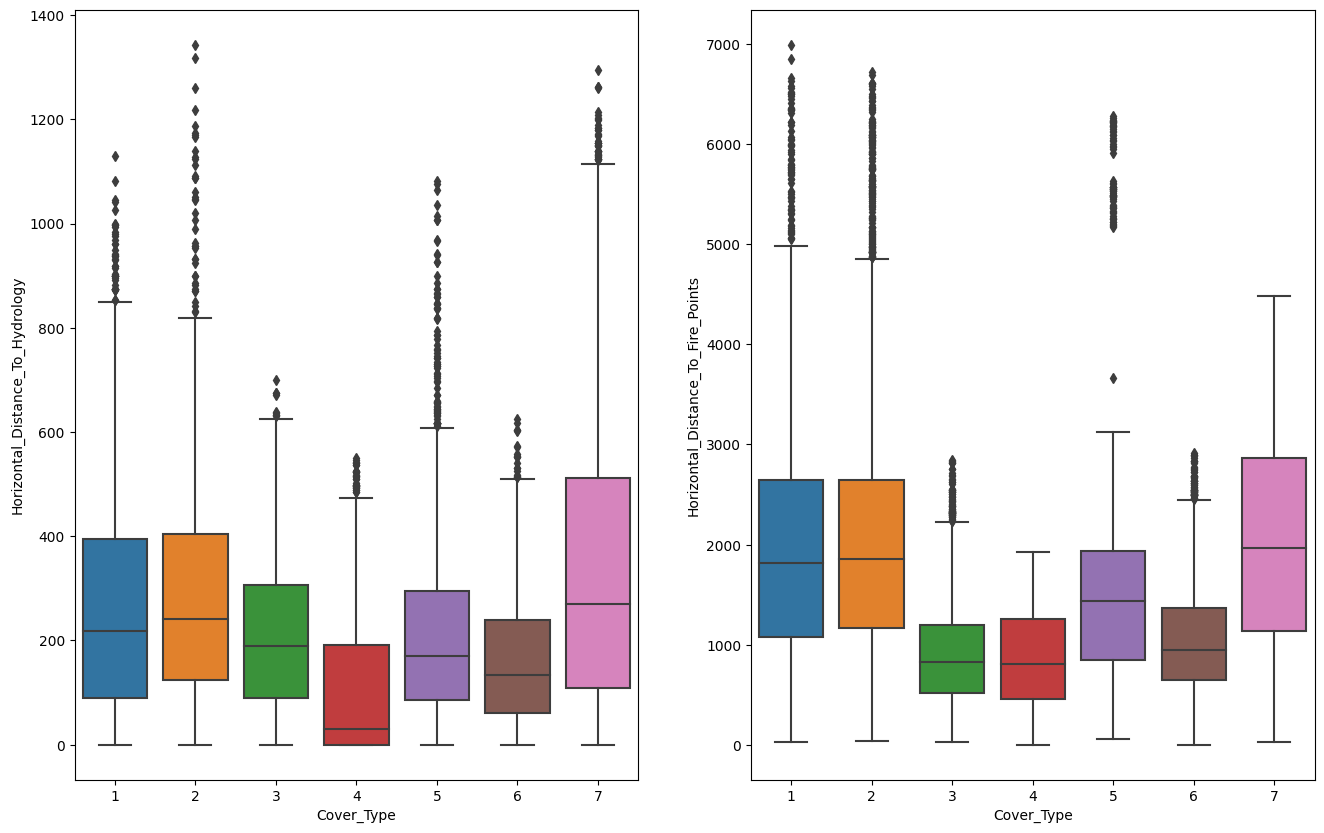

In [105]:
fig , axes = plt.subplots(1,2,figsize=(16,10))
sns.boxplot(x=df['Cover_Type'],y=df['Horizontal_Distance_To_Hydrology'],ax = axes[0])
sns.boxplot(x=df['Cover_Type'],y=df['Horizontal_Distance_To_Fire_Points'],ax =  axes[1])

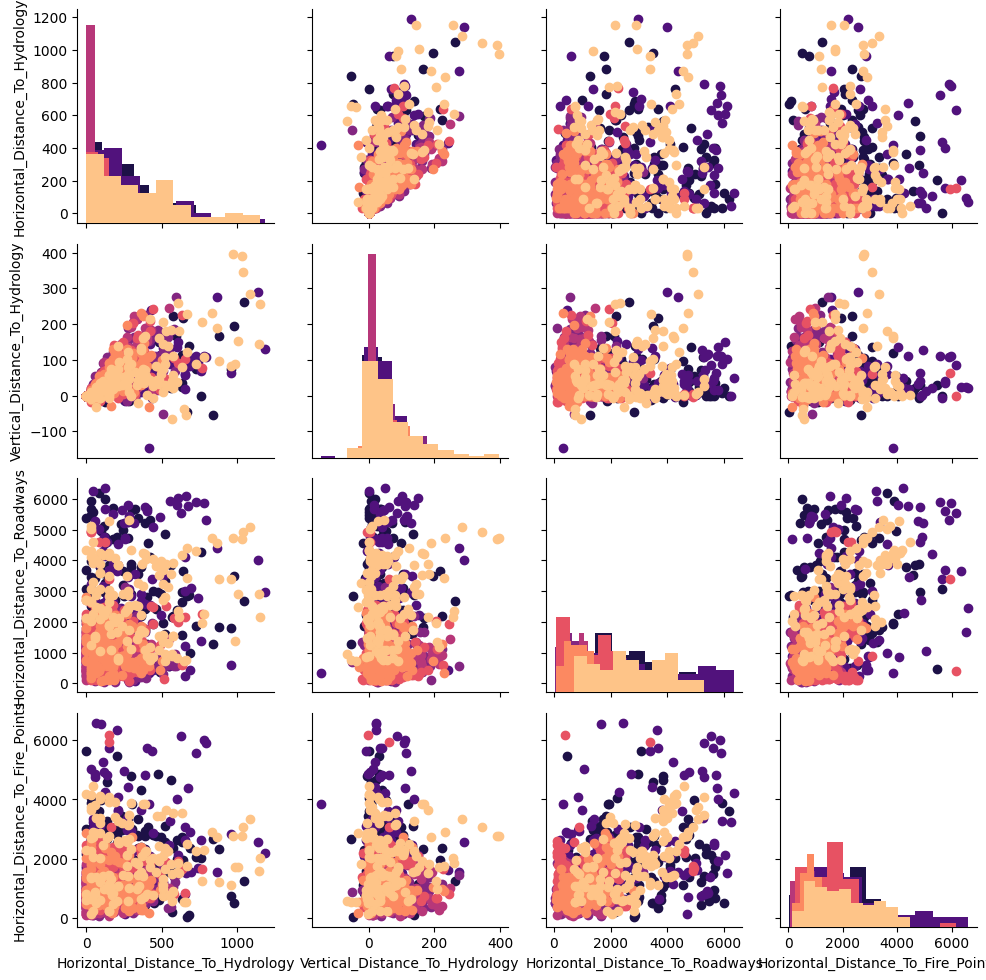

In [106]:
df2 = df[['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points','Cover_Type']].sample(1000)
g = sns.PairGrid(df2,hue='Cover_Type',palette='magma')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

Text(0.5, 1.0, 'scatter plot of Horizontal_Distance_To_Fire_Points before removing outliers')

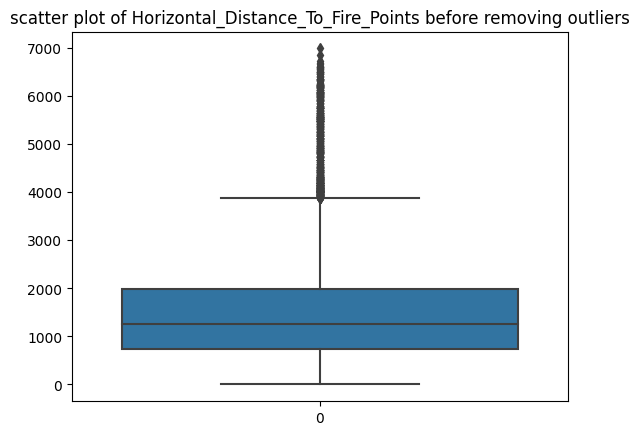

In [107]:

sns.boxplot(df['Horizontal_Distance_To_Fire_Points'])
plt.title('scatter plot of Horizontal_Distance_To_Fire_Points before removing outliers')

In [108]:
def outlier_function(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (3 * iqr)
    upper_bound = q3 + (3 * iqr)
    outlier_count = 0
    for i in df[col_name]:
        if i < lower_bound or i > upper_bound:
            outlier_count += 1
    return lower_bound, upper_bound, outlier_count

In [109]:
for column in df.columns.drop(['Wilderness_Area_Type']):
    if outlier_function(df, column)[2] > 0:
        print("There are {} outliers in {}".format(
            outlier_function(df, column)[2], column))

There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 49 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points
There are 3597 outliers in Wilderness_Area1
There are 499 outliers in Wilderness_Area2
There are 355 outliers in Soil_Type1
There are 623 outliers in Soil_Type2
There are 962 outliers in Soil_Type3
There are 843 outliers in Soil_Type4
There are 165 outliers in Soil_Type5
There are 650 outliers in Soil_Type6
There are 1 outliers in Soil_Type8
There are 10 outliers in Soil_Type9
There are 2142 outliers in Soil_Type10
There are 406 outliers in Soil_Type11
There are 227 outliers in Soil_Type12
There are 476 outliers in Soil_Type13
There are 169 outliers in Soil_Type14
There are 114 outliers in Soil_Type16
There are 612 outliers in Soil_Type17
There are 60 outliers in Soil_Type18
There a

In [110]:
df = df[(df['Horizontal_Distance_To_Fire_Points'] > outlier_function(df, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (df['Horizontal_Distance_To_Fire_Points'] < outlier_function(df, 'Horizontal_Distance_To_Fire_Points')[1])]

In [111]:
print(len(df['Horizontal_Distance_To_Fire_Points']))


14988


In [112]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wilderness_Area_Type
11,2886,151,11,371,26,5253,234,240,136,4051,...,0,0,0,0,0,0,0,0,2,Wilderness_Area1
14,2503,157,4,67,4,674,224,240,151,5600,...,0,0,0,0,0,0,0,0,5,Wilderness_Area1
15,2495,51,7,42,2,752,224,225,137,5576,...,0,0,0,0,0,0,0,0,5,Wilderness_Area1
17,2517,72,7,85,6,595,228,227,133,5607,...,0,0,0,0,0,0,0,0,5,Wilderness_Area1
18,2504,0,4,95,5,691,214,232,156,5572,...,0,0,0,0,0,0,0,0,5,Wilderness_Area1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,...,0,0,0,0,0,0,0,0,3,Wilderness_Area3
15116,2603,121,19,633,195,618,249,221,91,1325,...,0,0,0,0,0,0,0,0,3,Wilderness_Area3
15117,2492,134,25,365,117,335,250,220,83,1187,...,0,0,0,0,0,0,0,0,3,Wilderness_Area3
15118,2487,167,28,218,101,242,229,237,119,932,...,0,0,0,0,0,0,0,0,3,Wilderness_Area3


Text(0, 0.5, 'Vertical Distance To Hydrology')

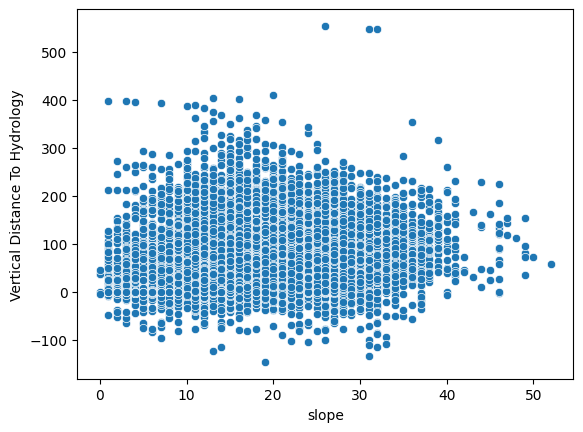

In [113]:
sns.scatterplot(x='Slope',y='Vertical_Distance_To_Hydrology',data=df)
plt.xlabel('slope')
plt.ylabel('Vertical Distance To Hydrology')

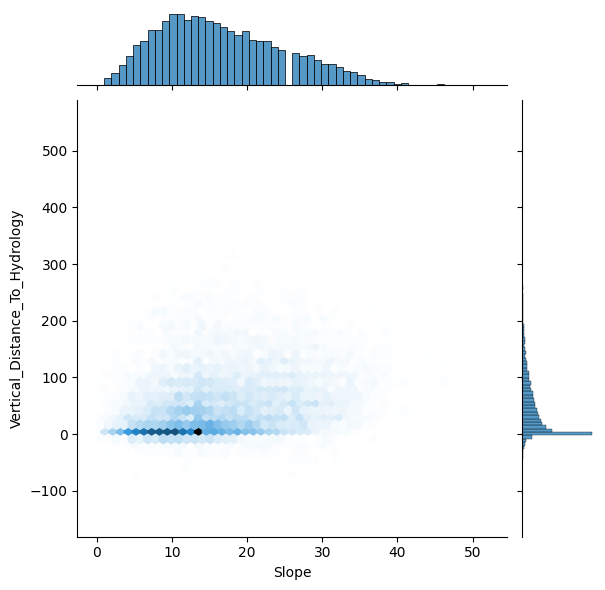

In [114]:
sns.jointplot(x='Slope',y='Vertical_Distance_To_Hydrology',data=df,kind='hex')

<AxesSubplot: xlabel='Cover_Type', ylabel='Count'>

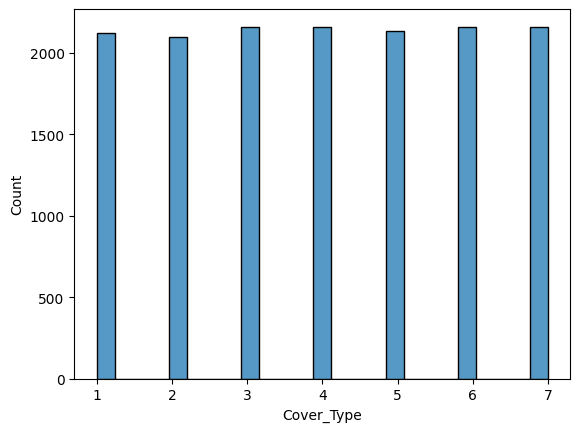

In [115]:
sns.histplot(df['Cover_Type'],bins=25)

## Feature Engineering


<AxesSubplot: xlabel='Elevation', ylabel='Count'>

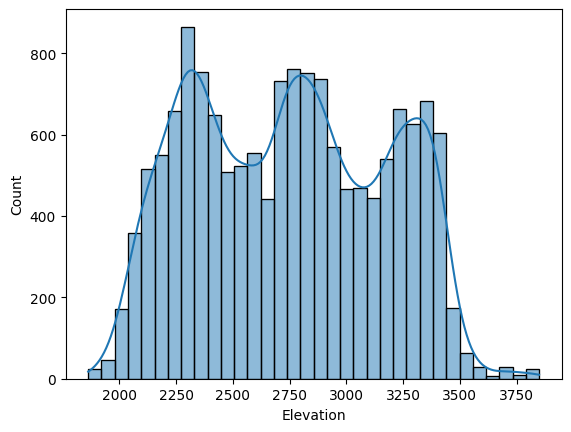

In [116]:
sns.histplot(df['Elevation'],kde=True)

Text(0.5, 1.0, 'Density of Cover Types Among Different Wilderness Areas')

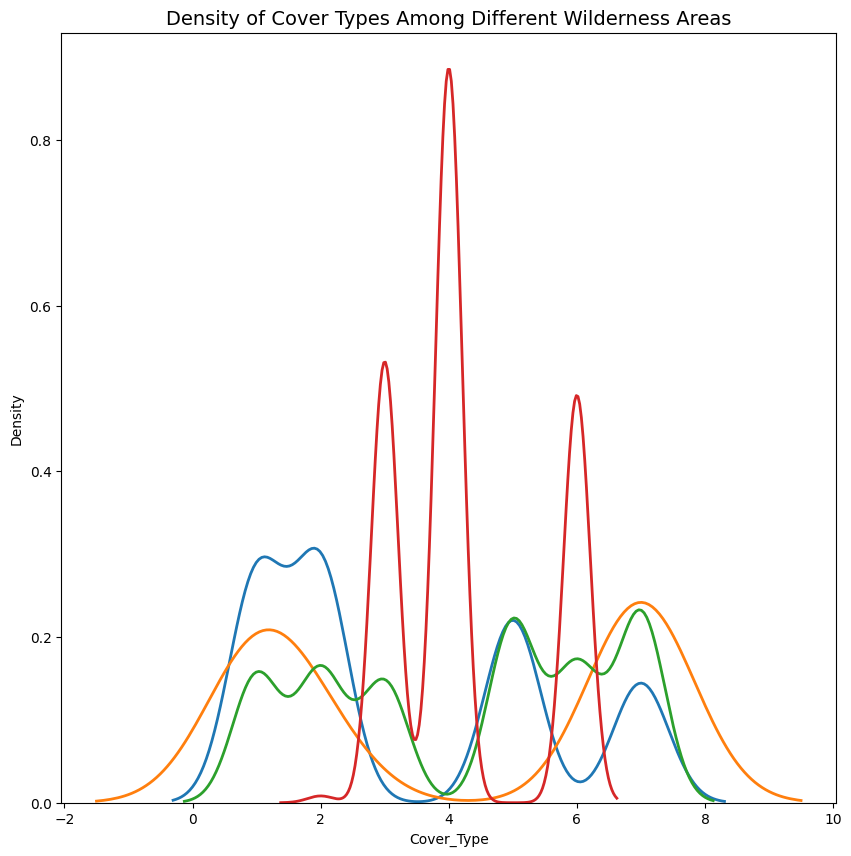

In [117]:
plt.figure(figsize=(10, 10))

for area in wilderness_areas:
    subset = df[df['Wilderness_Area_Type'] == area]
    sns.kdeplot(subset["Cover_Type"], label=area, linewidth=2)


plt.ylabel("Density")
plt.xlabel("Cover_Type")

plt.title("Density of Cover Types Among Different Wilderness Areas", size=14)

In [118]:
def split_numbers_chars(row):
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [119]:
reverse_one_hot_encode(df, 16, 56, "Soil_Type")
df


/var/folders/00/32vkw5gx2rg0_bz_rqj3vpsc0000gn/T/ipykernel_33272/3284864343.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
/var/folders/00/32vkw5gx2rg0_bz_rqj3vpsc0000gn/T/ipykernel_33272/3284864343.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
/var/folders/00/32vkw5gx2rg0_bz_rqj3vpsc0000gn/T/ipykernel_33272/3284864343.py:9: SettingWi

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wilderness_Area_Type,Soil_Type
11,2886,151,11,371,26,5253,234,240,136,4051,...,0,0,0,0,0,0,0,2,Wilderness_Area1,30
14,2503,157,4,67,4,674,224,240,151,5600,...,0,0,0,0,0,0,0,5,Wilderness_Area1,18
15,2495,51,7,42,2,752,224,225,137,5576,...,0,0,0,0,0,0,0,5,Wilderness_Area1,16
17,2517,72,7,85,6,595,228,227,133,5607,...,0,0,0,0,0,0,0,5,Wilderness_Area1,18
18,2504,0,4,95,5,691,214,232,156,5572,...,0,0,0,0,0,0,0,5,Wilderness_Area1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,...,0,0,0,0,0,0,0,3,Wilderness_Area3,4
15116,2603,121,19,633,195,618,249,221,91,1325,...,0,0,0,0,0,0,0,3,Wilderness_Area3,4
15117,2492,134,25,365,117,335,250,220,83,1187,...,0,0,0,0,0,0,0,3,Wilderness_Area3,4
15118,2487,167,28,218,101,242,229,237,119,932,...,0,0,0,0,0,0,0,3,Wilderness_Area3,4


In [120]:
df.drop(['Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40'], axis=1, inplace=True)

/var/folders/00/32vkw5gx2rg0_bz_rqj3vpsc0000gn/T/ipykernel_33272/1404587319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40'], axis=1, inplace=True)


In [121]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type,Wilderness_Area_Type,Soil_Type
11,2886,151,11,371,26,5253,234,240,136,4051,1,0,0,0,2,Wilderness_Area1,30
14,2503,157,4,67,4,674,224,240,151,5600,1,0,0,0,5,Wilderness_Area1,18
15,2495,51,7,42,2,752,224,225,137,5576,1,0,0,0,5,Wilderness_Area1,16
17,2517,72,7,85,6,595,228,227,133,5607,1,0,0,0,5,Wilderness_Area1,18
18,2504,0,4,95,5,691,214,232,156,5572,1,0,0,0,5,Wilderness_Area1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,3,Wilderness_Area3,4
15116,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,3,Wilderness_Area3,4
15117,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,3,Wilderness_Area3,4
15118,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,3,Wilderness_Area3,4


/var/folders/00/32vkw5gx2rg0_bz_rqj3vpsc0000gn/T/ipykernel_33272/2724373624.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = pd.DataFrame(df.corr())


Text(0.5, 1.0, 'Correlation Heatmap')

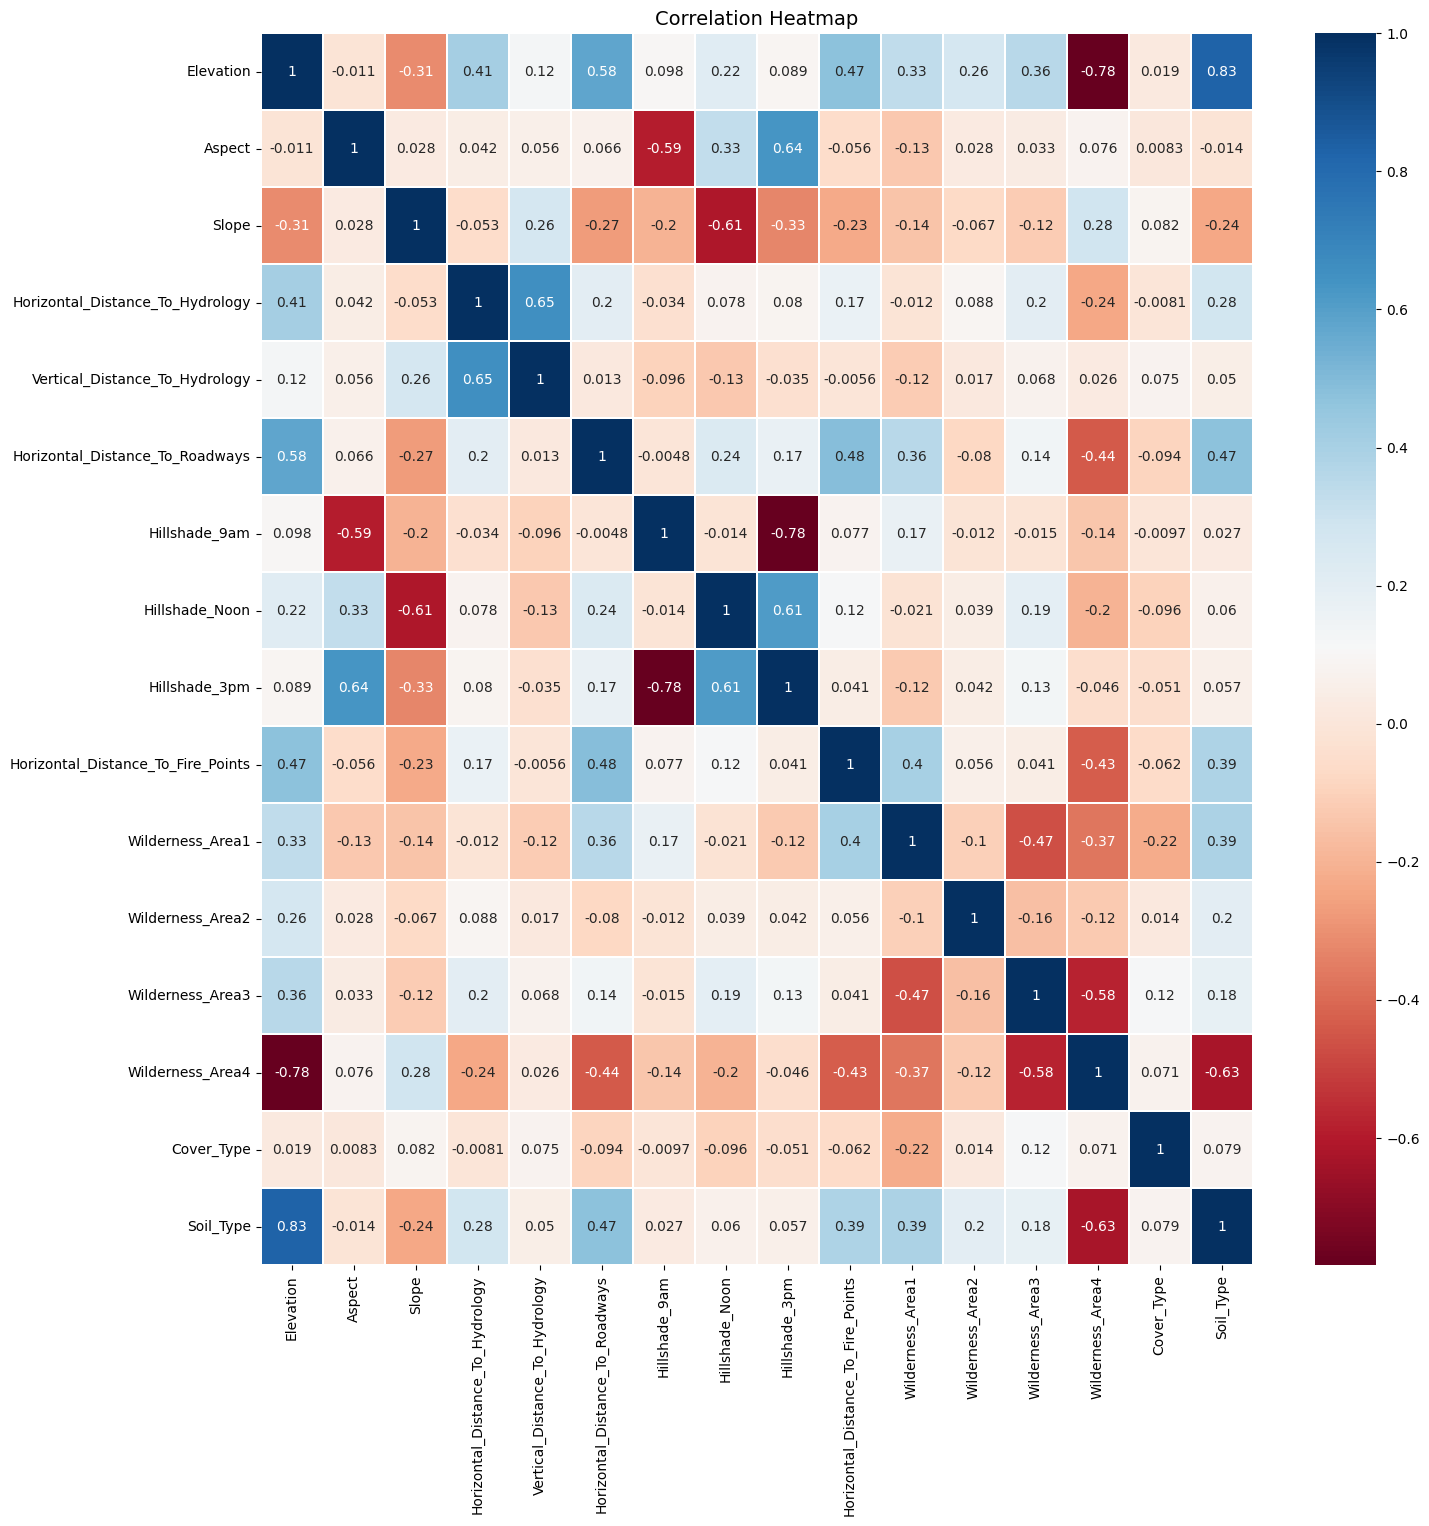

In [122]:
colormap = plt.cm.RdBu
corr = pd.DataFrame(df.corr())
plt.figure(figsize=(16,16))
sns.heatmap(corr, linewidths=0.1,square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Correlation Heatmap', size=14)

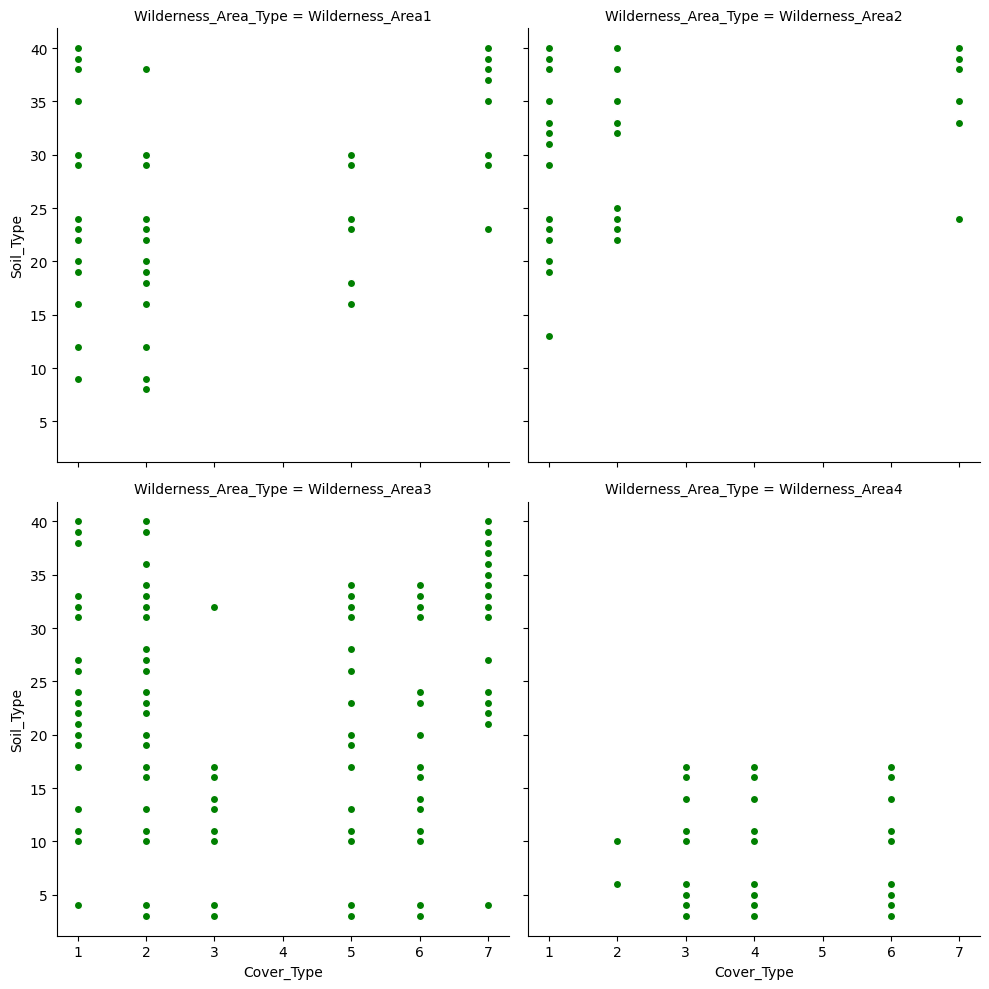

In [123]:
g = sns.FacetGrid(df, col="Wilderness_Area_Type", col_wrap=2,
                  height=5, col_order=wilderness_areas)
g = g.map(plt.scatter, "Cover_Type", "Soil_Type", edgecolor="w", color="g")

In [124]:
df['Mean_Elevation_Vertical_Distance_Hydrology'] = (df['Elevation'] +df['Vertical_Distance_To_Hydrology'])/2
df['Mean_Distance_Hydrology_Firepoints'] = (df['Horizontal_Distance_To_Hydrology'] +df['Horizontal_Distance_To_Fire_Points'])/2
df['Mean_Distance_Hydrology_Roadways'] = (df['Horizontal_Distance_To_Hydrology'] + df['Horizontal_Distance_To_Roadways'])/2
df['Mean_Distance_Firepoints_Roadways'] = (df['Horizontal_Distance_To_Fire_Points'] + df['Horizontal_Distance_To_Roadways'])/2

/var/folders/00/32vkw5gx2rg0_bz_rqj3vpsc0000gn/T/ipykernel_33272/4180349712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mean_Elevation_Vertical_Distance_Hydrology'] = (df['Elevation'] +df['Vertical_Distance_To_Hydrology'])/2
/var/folders/00/32vkw5gx2rg0_bz_rqj3vpsc0000gn/T/ipykernel_33272/4180349712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mean_Distance_Hydrology_Firepoints'] = (df['Horizontal_Distance_To_Hydrology'] +df['Horizontal_Distance_To_Fire_Points'])/2
/var/folders/00/32v

In [125]:
df['Euclidean_Distance_To_Hydrology']=(((df['Horizontal_Distance_To_Hydrology'])**2+(df['Vertical_Distance_To_Hydrology'])**2)**0.5)
df.drop(columns=['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Wilderness_Area_Type'],axis=1,inplace=True)
df.columns

/var/folders/00/32vkw5gx2rg0_bz_rqj3vpsc0000gn/T/ipykernel_33272/1641005287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Euclidean_Distance_To_Hydrology']=(((df['Horizontal_Distance_To_Hydrology'])**2+(df['Vertical_Distance_To_Hydrology'])**2)**0.5)
/var/folders/00/32vkw5gx2rg0_bz_rqj3vpsc0000gn/T/ipykernel_33272/1641005287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Wilderness_Area_Type'],axis=1,inplace=True)


Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Cover_Type', 'Soil_Type', 'Mean_Elevation_Vertical_Distance_Hydrology',
       'Mean_Distance_Hydrology_Firepoints',
       'Mean_Distance_Hydrology_Roadways', 'Mean_Distance_Firepoints_Roadways',
       'Euclidean_Distance_To_Hydrology'],
      dtype='object')

## Heat Map of Final DataFrame


In [127]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Cover_Type', 'Soil_Type', 'Mean_Elevation_Vertical_Distance_Hydrology',
       'Mean_Distance_Hydrology_Firepoints',
       'Mean_Distance_Hydrology_Roadways', 'Mean_Distance_Firepoints_Roadways',
       'Euclidean_Distance_To_Hydrology'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Heatmap')

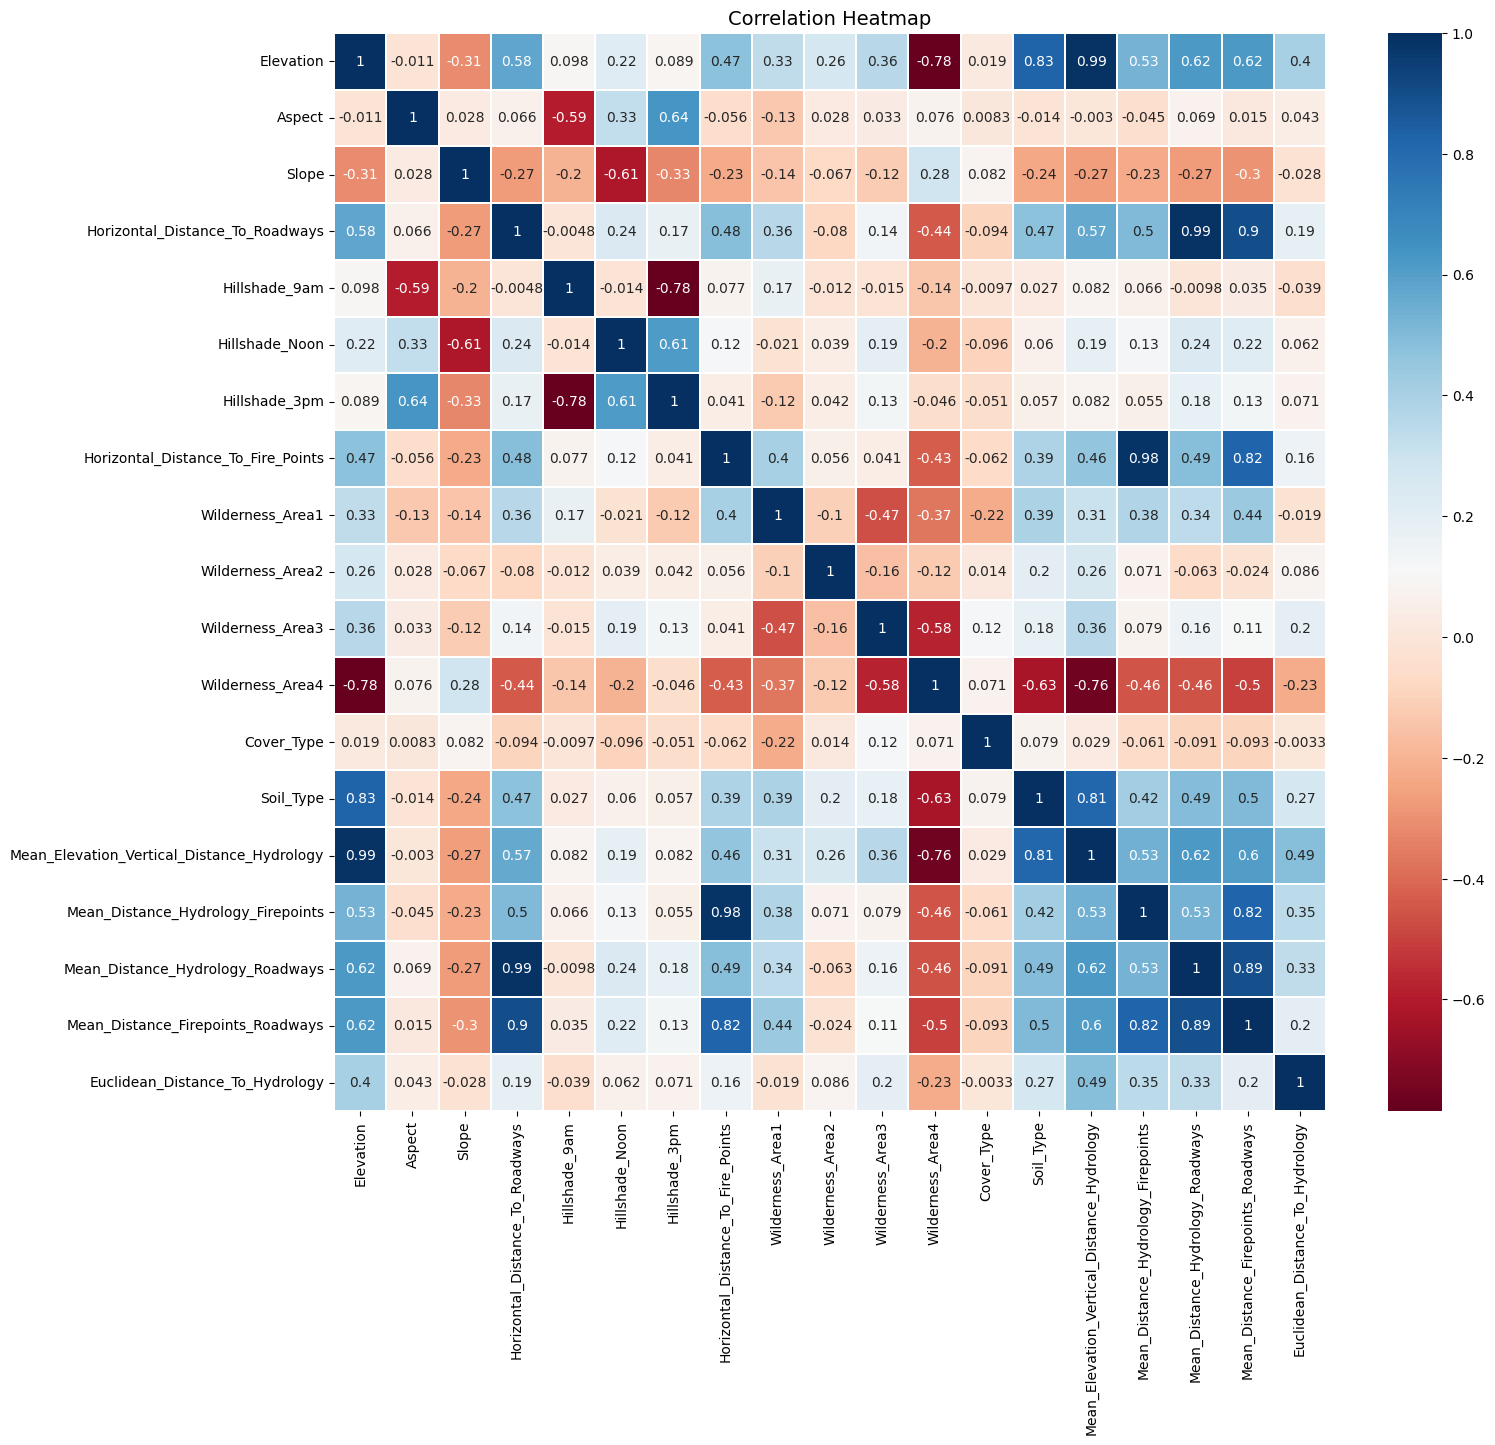

In [128]:
colormap = plt.cm.RdBu


plt.figure(figsize = (16, 14))
sns.heatmap(df.corr(), linewidths=0.1,square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Correlation Heatmap', size=14)

In [29]:
X_Train,X_Valid,Y_Train,Y_Valid = train_test_split(df,df['Cover_Type'],test_size=0.2,random_state=1)
print('Training Data Shape:', X_Train.shape)
print('Validation Data Shape:', X_Valid.shape)
print('Training Label Shape:', Y_Train.shape)
print('Validation Label Shape:', Y_Valid.shape)

Training Data Shape: (11990, 19)
Validation Data Shape: (2998, 19)
Training Label Shape: (11990,)
Validation Label Shape: (2998,)


#### Training the ML using the Training Set and checking the accuracy of those the prediction

In [30]:
scaler = StandardScaler()
X_Train_scaled = scaler.fit_transform(X_Train,Y_Train)
X_Valid_scaled = scaler.fit_transform(X_Valid)

In [31]:
model = LogisticRegression(multi_class='multinomial',solver='lbfgs')
model.fit(X_Train_scaled,Y_Train)
lr_probs = model.predict_proba(X_Valid)
lr_auc = roc_auc_score(Y_Valid,lr_probs,multi_class='ovr')
Y_predicted = model.predict(X_Valid_scaled)

print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Accuracy :',accuracy_score(Y_Valid,Y_predicted))
print('F1 Score :',f1_score(Y_Valid,Y_predicted,average='weighted'))

Logistic: ROC AUC=0.500
Accuracy : 0.9953302201467645
F1 Score : 0.9953282380408797


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [32]:
model = KNeighborsClassifier()
model.fit(X_Train_scaled,Y_Train)
Y_predicted = model.predict(X_Valid_scaled)

print('Accuracy :',accuracy_score(Y_Valid,Y_predicted))
print('F1 Score :',f1_score(Y_Valid,Y_predicted,average='weighted'))

Accuracy : 0.9359573048699132
F1 Score : 0.935321360466289


In [33]:
model = RandomForestClassifier()
model.fit(X_Train_scaled,Y_Train)
Y_predicted = model.predict(X_Valid_scaled)
print('Accuracy :',accuracy_score(Y_Valid,Y_predicted))
print('F1 Score :',f1_score(Y_Valid,Y_predicted,average='weighted'))

Accuracy : 0.9996664442961974
F1 Score : 0.9996664316769232


In [34]:
model = ExtraTreesClassifier()
model.fit(X_Train_scaled,Y_Train)
Y_predicted = model.predict(X_Valid_scaled)
print('Accuracy :',accuracy_score(Y_Valid,Y_predicted))
print('F1 Score :',f1_score(Y_Valid,Y_predicted,average='weighted'))

Accuracy : 1.0
F1 Score : 1.0
